In [1]:
DF_PATH = 'c:/Users/Ahmed Sadek/ete_project/ml_project/data/processed/preprocessed001_df.pkl'
FEATURE_PATH = 'c:/Users/Ahmed Sadek/ete_project/ml_project/data/processed/features_skills_clusters.pkl'
ROLES_COL =['DevType']
TECH_COLS      = ['LanguageHaveWorkedWith',
                  'DatabaseHaveWorkedWith',
                  'PlatformHaveWorkedWith',
                  'WebframeHaveWorkedWith',
                  'MiscTechHaveWorkedWith',
                  'ToolsTechHaveWorkedWith',
                  'NEWCollabToolsHaveWorkedWith']
EXPORT_PATH = 'c:/Users/Ahmed Sadek/ete_project/ml_project/data/processed/clean_data'

In [2]:
import numpy as np
import pandas as pd 
import pickle 

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
#Read data 
processed_data = pd.read_pickle(DF_PATH)
feature_data = pd.read_pickle(FEATURE_PATH)

In [4]:
encoded_dfs = {}
for col in ROLES_COL+TECH_COLS:
    binarzier = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarzier.fit_transform(processed_data[col]),columns=binarzier.classes_,index= processed_data[col].index)
    encoded_dfs[col] = encoded_df 
#merge 1-hot encoded
encoded_dfs = pd.concat(encoded_dfs, axis= 1)    

encoded_dfs

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
83434                   0                        0   
83435                   0                        0   
83436                   0                        0   
83437                   0                        0   
83438                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
83434                                             0                      0   
83435                                             0                      0   
83436                                             1                      0   
83437                                             0                      0   
83438                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
83434        0                 0                     0                   1   
83435        0                 0                     0                   0   
83436        0                 1                     0                   0   
83437        0                 0                     0                   1   
83438        0                 0                     0                   1   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 1   
...                                             ...   
83434                                             0   
83435                                             0   
83436                                             0   
83437                                             0   
83438                                             0   

                                                   ...  \
      Developer, embedded applications or devices  ...   
0                                               0  ...   
1                                               0  ...   
2                                               0  ...   
3                                               0  ...   
4                                               0  ...   
...                                           ...  ...   
83434                                           0  ...   
83435                                          

In [5]:
#Quick sanity check 
i = np.random.randint(processed_data.shape[0])
#print orginial values 
print(processed_data.iloc[i][ROLES_COL].tolist())
print(processed_data.iloc[i][TECH_COLS].tolist())
print("----------------")
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i] == 1])
print("----------------")

# Check clustering 
print("Clusters:",feature_data.iloc[i].sum())
print("Skills:",  encoded_dfs[TECH_COLS].iloc[i].sum())

[['Developer, front-end', 'Developer, desktop or enterprise applications', 'Developer, full-stack', 'Developer, back-end']]
[['Bash/Shell', 'C++', 'Python', 'TypeScript'], [], [], ['Angular'], ['Qt'], ['Git'], ['Eclipse', 'PyCharm', 'Visual Studio Code']]
----------------
DevType                       Developer, back-end                              1
                              Developer, desktop or enterprise applications    1
                              Developer, front-end                             1
                              Developer, full-stack                            1
LanguageHaveWorkedWith        Bash/Shell                                       1
                              C++                                              1
                              Python                                           1
                              TypeScript                                       1
WebframeHaveWorkedWith        Angular                                          

In [6]:
#Exclude roles 
EXCULDE_ROLES = [
    'Other (please specify):',
    'Student',
    'Designer',
    'Educator',
    'Marketing or sales professional',
    'Engineering manager',
    'Senior Executive (C-Suite, VP, etc.)',
    'Product manager',
    'Engineer, site reliability']

for role in EXCULDE_ROLES:
    encoded_dfs = encoded_dfs.drop(('DevType',role), axis=1)

In [7]:
original_role_sum = encoded_dfs["DevType"].sum(axis=0)
original_role_sum

Academic researcher                               2899
Data or business analyst                          3792
Data scientist or machine learning specialist     4273
Database administrator                            5655
DevOps specialist                                 7058
Developer, QA or test                             3611
Developer, back-end                              29071
Developer, desktop or enterprise applications    11036
Developer, embedded applications or devices       4598
Developer, front-end                             18231
Developer, full-stack                            32891
Developer, game or graphics                       2112
Developer, mobile                                 9800
Engineer, data                                    4176
Scientist                                         2015
System administrator                              6079
dtype: int64

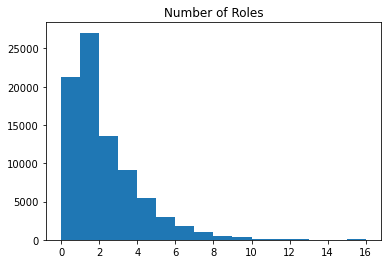

In [8]:
#Filter data
freq_roles = encoded_dfs[ROLES_COL].sum(axis=1)
plt.hist(freq_roles,freq_roles.max())
plt.title('Number of Roles')
plt.show()

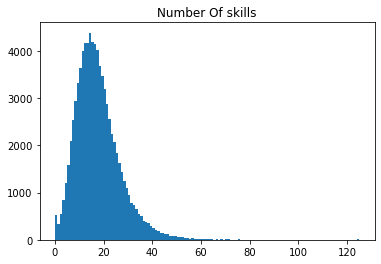

In [9]:
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech,freq_tech.max())
plt.title('Number Of skills')
plt.show()

In [11]:
#filter frequences
ROLES_RANGE  = [1,3]
TECH_RANGE =[3,30]

In [12]:
#create masks
role_mask =(freq_roles>= ROLES_RANGE[0])& (freq_roles<= ROLES_RANGE[1])
tech_mask = (freq_tech >= TECH_RANGE[0])& (freq_tech<= TECH_RANGE[1])
filter_mask  = role_mask & tech_mask

In [13]:
feature_data = feature_data.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()

In [14]:
cleaned_role_sum =encoded_dfs['DevType'].sum(axis=0)
cleaned_role_sum 


Academic researcher                               1708
Data or business analyst                          1658
Data scientist or machine learning specialist     2460
Database administrator                            1210
DevOps specialist                                 3056
Developer, QA or test                             1135
Developer, back-end                              17084
Developer, desktop or enterprise applications     4845
Developer, embedded applications or devices       2138
Developer, front-end                              8932
Developer, full-stack                            20655
Developer, game or graphics                        899
Developer, mobile                                 4751
Engineer, data                                    1941
Scientist                                         1046
System administrator                              2069
dtype: int64

In [16]:
feature_data.columns = pd.MultiIndex.from_product([['skills_clusters'], feature_data.columns])
                                                   
df = pd.concat([encoded_dfs,feature_data],axis=1)       
df.to_pickle(EXPORT_PATH)